# **4.01 ニューラルネットワークでXORの学習**

# 【データの準備と確認】


リスト4-1：（リストA）

In [9]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


リスト4-2

In [10]:
input_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
xor_data = [0, 1, 1, 0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）：")
print(x_train)
print(f"学習データ（答え）：{y_train}")

学習データ（問題）：
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）：[0 1 1 0]


# 【モデルを作って学習】

リスト4-3

In [11]:
model = keras.models.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


リスト4-4：（リストB）

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=500,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.6423 - accuracy: 0.7500 - val_loss: 0.6413 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 454ms/step - loss: 0.6413 - accuracy: 0.5000 - val_loss: 0.6403 - val_accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 302ms/step - loss: 0.6403 - accuracy: 0.7500 - val_loss: 0.6392 - val_accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 172ms/step - loss: 0.6392 - accuracy: 0.7500 - val_loss: 0.6381 - val_accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 195ms/step - loss: 0.6381 - accuracy: 0.7500 - val_loss: 0.6370 - val_accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 337ms/step - loss: 0.6370 - accuracy: 0.7500 - val_loss: 0.6359 - val_accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 213ms/step - loss: 0.6359 - accuracy: 0.7500 - val_loss: 0.6348 - val_accuracy: 0.7500
Epoch 8/500
1/1 

リスト4-5：（リストC）

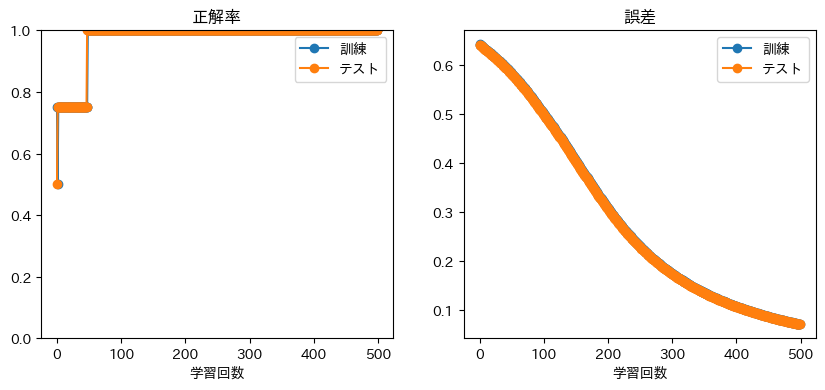

In [13]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト4-6

In [15]:
pre = model.predict(x_test)
print(pre)

1/1 [==============================] - 0s 21ms/step
[[0.8810227  0.11897732]
 [0.00818469 0.99181527]
 [0.01991168 0.9800883 ]
 [0.8809618  0.11903826]]


リスト4-7

In [16]:
for i in range(4):
    index = np.argmax(pre[i])
    print(f"入力は{x_test[i]}、出力は{index}")

入力は[0 0]、出力は0
入力は[1 0]、出力は1
入力は[0 1]、出力は1
入力は[1 1]、出力は0
